<a href="https://colab.research.google.com/github/khushi1804/AgraScan/blob/main/Copy_of_Major_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import all the Dependencies

```
# This is formatted as code
```



In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
BATCH_SIZE = 50
IMAGE_SIZE = 256
CHANNELS=15
EPOCHS=40

###Drive Mount


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage1",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 14927 files belonging to 15 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(55, 256, 256, 3)
[ 7 11 10  9  5  7  6  9  2  6 12 13  8  7 10  6 12  5 14 11  7 11  5 14
  2  3 11 12 12  8 12  5 14  9  5  7  3 12 10  2  9  5 11  9  2 14  9  9
 10  7  9  9  6 10 14]


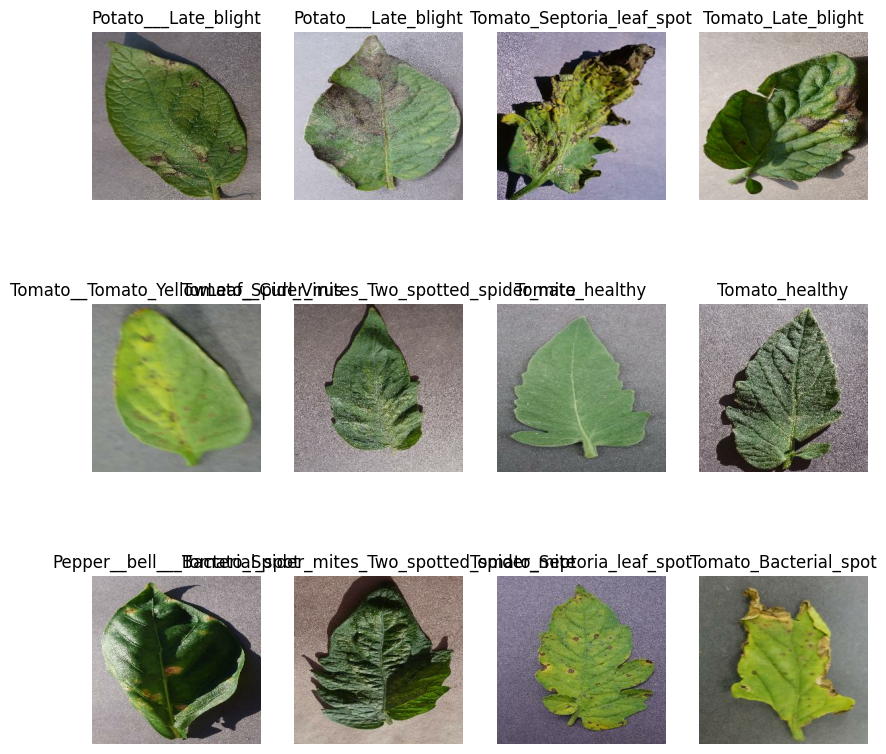

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

272

In [ ]:
train_size = 0.8
len(dataset)*train_size

217.60000000000002

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

218

In [ ]:
val_size=0.08
len(dataset)*val_size

21.76

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

212

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)



217

In [ ]:
len(val_ds)

27

In [ ]:
len(test_ds)

28

In [ ]:
Data = pd.read_excel(r'/content/types of tpb n.xlsx')
Data

,Type Of Plant,Classification of Plants,disease 1,pesticide1,disease 2,pesticide 2,disease 3,pesticide 3,disease 4,pesticide 4,disease 5,pesticide 5
0,TOMATO,Cherry tomato,Early blight,chlorothalonil,late Blight,chlorothalonil,Anthracnose,mancozeb,Septorial Leaf spot,Azoxystrobin,NaN,NaN
1,NaN,Grape Tomato,Powdery mildew,"sulphur,neem oil",Late Blight,chlorothalonil,Leaf Mold,pyraclostrobin,Tomato Mosaic virus,no pesticides available,Bacterial spot,copper based fungicides
2,NaN,Roma Tomatoes,Early blight,chlorothalonil,Septorial Leaf spot,chlorothalonil,blossom end rot,calcium based spray,fusarium wilt,chlorothalonil,NaN,NaN
3,NaN,Beef steak tomato,Early blight,chlorothalonil,late Blight,chlorothalonil,Septorial Leaf spot,chlorothalonil,Bacterial spot,copper based fungicides,NaN,NaN
4,NaN,Heirloom tomato,early blight,chlorothalonil,late Blight,chlorothalonil,Septorial Leaf spot,chlorothalonil,Bacterial spot,copper based fungicides,NaN,NaN
5,NaN,Tomatoes on the vine,Early blight,chlorothalonil,late Blight,chlorothalonil,Septorial Leaf spot,copper based fungicides,gray mold,pyraclostrobin,Bacterial spot,copper based fungicides
6,NaN,Green Tomatoes,Early blight,chlorothalonil,late Blight,chlorothalonil,Tomato Mosaic virus,no pesticides available,fusarium wilt,prothioconazole,NaN,NaN
7,POTATOES,white potatoes,late blight,chlorothalonil,early blight,chlorothalonil,blackleg,metalaxyl,potato scab,chlorothalonil,potato virus,neonicotinoids
8,NaN,Fingerling potatoes,late blight,chlorothalonil,early blight,chlorothalonil,blackleg,metalaxyl,potato scab,chlorothalonil,potato virus,neonicotinoids
9,NaN,Red potatoes,late blight,mancozeb,early blight,chlorothalonil,blackleg,metalaxyl,potato scab,chlorothalonil,potato virus,neonicotinoids


### Cache, Shuffle, and Prefetch the Dataset


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Building the **Model** **bold text**
### Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size.
Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256).
This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

def resize_images_in_folder(PlantVillage1, target_size=(256, 256)):
    resized_images = []
    for filename in ("/content/drive/MyDrive/PlantVillage1"):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(PlantVillage1, )
            img_array = img_to_array(img)
            resized_images.append(img_array)
    return np.array(resized_images)

# Assuming you have three folders: folder1, folder2, and folder3
folder_paths = ['/content/drive/MyDrive/PlantVillage1/Potato___Early_blight', '/content/drive/MyDrive/PlantVillage1/Potato___healthy', '/content/drive/MyDrive/PlantVillage1/Potato___Late_blight']

all_images_resized = []
for folder_path in folder_paths:
    resized_images = resize_images_in_folder(folder_path)
    all_images_resized.append(resized_images)

# Now, 'all_images_resized' is a list containing NumPy arrays of resized images from each folder
# You can concatenate them along the appropriate axis if needed
final_resized_images = np.concatenate(all_images_resized, axis=0)

### Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


### Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (55, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (55, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (55, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (55, 62, 62, 64)          0         
 g2D)                                                 

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [ ]:
print(train_ds.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
!pip install keras

In [ ]:
import keras

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(10, activation="relu"),
        layers.Dense(3, activation="softmax"),
    ]
)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=25,
)

Epoch 1/25
217/217 [==============================] - 220s 1s/step - loss: 2.4285 - accuracy: 0.1846 - val_loss: 2.1368 - val_accuracy: 0.2936
Epoch 2/25
217/217 [==============================] - 190s 873ms/step - loss: 1.7201 - accuracy: 0.4198 - val_loss: 1.4927 - val_accuracy: 0.4761
Epoch 3/25
217/217 [==============================] - 189s 871ms/step - loss: 1.2192 - accuracy: 0.5765 - val_loss: 3.5519 - val_accuracy: 0.2862
Epoch 4/25
217/217 [==============================] - 189s 871ms/step - loss: 0.9759 - accuracy: 0.6547 - val_loss: 1.2307 - val_accuracy: 0.5872
Epoch 5/25
217/217 [==============================] - 191s 878ms/step - loss: 0.7638 - accuracy: 0.7269 - val_loss: 1.7052 - val_accuracy: 0.5273
Epoch 6/25
217/217 [==============================] - 190s 876ms/step - loss: 0.6324 - accuracy: 0.7758 - val_loss: 0.9425 - val_accuracy: 0.7010
Epoch 7/25
217/217 [==============================] - 189s 870ms/step - loss: 0.5553 - accuracy: 0.8012 - val_loss: 1.1238 - va

In [ ]:
scores = model.evaluate(train_ds)

217/217 [==============================] - 124s 569ms/step - loss: 0.1852 - accuracy: 0.9372


In [ ]:
scores

[0.18524804711341858, 0.9372374415397644]

### Plotting the Accuracy and Loss Curves

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 217}

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt
def plot(func):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(EPOCHS), acc, label='Training Accuracy')
    plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
    y = func(x)
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(EPOCHS), loss, label='Training Loss')
    plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
plt.show()
plot

<function __main__.plot(func)>

### Run prediction on a sample image

first image to predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
2/2 [==============================] - 0s 75ms/step
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus


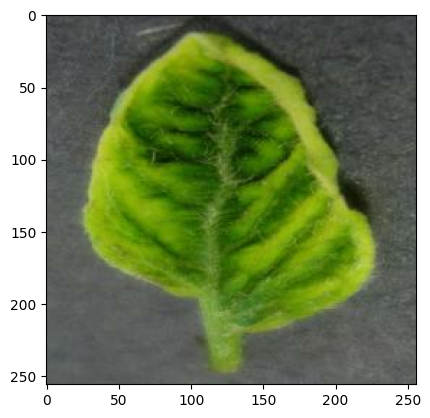

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


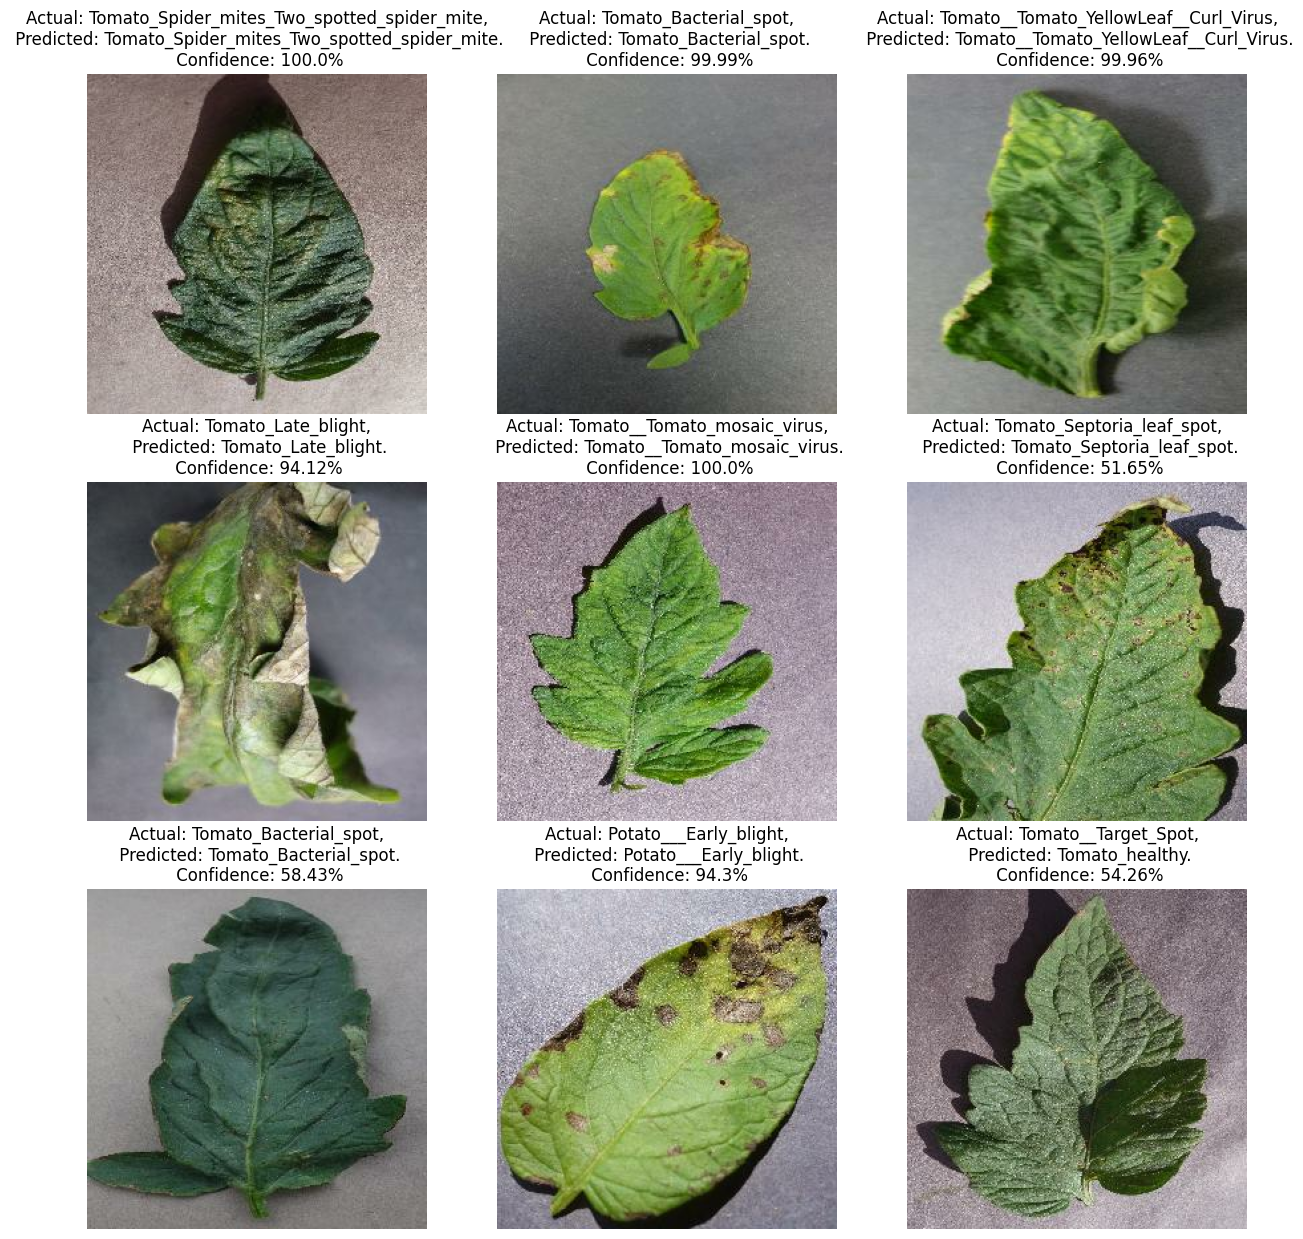

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

### Saving the Model
We append the model to the list of models as a new version

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Saved Models/saveeee.h5')
model.save('/content/drive/MyDrive/Saved Models/saveeee.hdf5')
